<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/An%C3%A1lise_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Gorjetas de um Restaurante
***

## 00. Importando as bibliotecas necessárias<font>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ou warnings.filterwarnings('action=once')

## 01. Verificando o dataset

In [96]:
df = pd.read_csv("tips.csv")
df[:5]

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


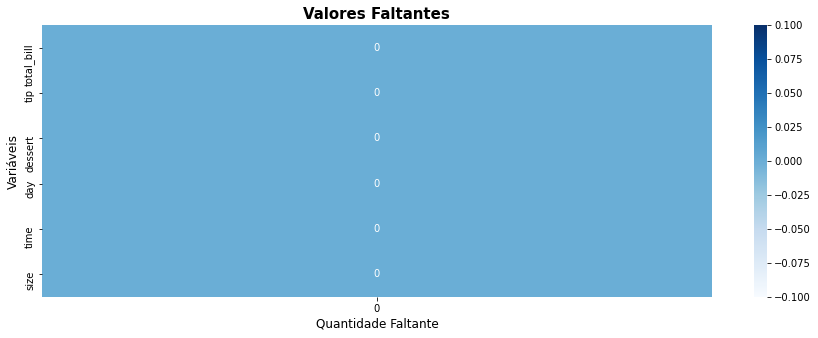

In [98]:
plt.figure(figsize=(15,5))
plt.title('Valores Faltantes',fontweight='bold', fontsize=15)
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='Blues')
ax.set_ylabel("Variáveis", fontsize=12)
ax.set_xlabel('Quantidade Faltante', fontsize=12)
plt.show()

In [99]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [100]:
print("Valores únicos:\n")
for field in df.columns:
    if np.dtype(df[field]) == 'object': print("{} --> {}".format(field,df[field].unique()))
df.nunique().to_frame().T

Valores únicos:

dessert --> ['No' 'Yes']
day --> ['Sun' 'Sat' 'Thur' 'Fri']
time --> ['Dinner' 'Lunch']


,total_bill,tip,dessert,day,time,size
0,229,123,2,4,2,6


## 02. Alterando os valores para o português

In [101]:
df.dessert=df.dessert.map({"No":"Não", "Yes":"Sim"})
df.day=df.day.map({"Sun":"Dom", "Sat":"Sab", "Thur":"Qui", "Fri":"Sex"})
df.time=df.time.map({"Dinner":"Jantar", "Lunch":"Almoço"})

df.rename(columns={'total_bill':'Valor da Conta', 'tip':'Gorjeta', 'dessert':'Sobremesa', 
                   'day':'Dia da Semana', 'time':'Refeição', 'size':'Total de Pessoas'}, inplace=True)
df.columns.name = 'Índice'

In [102]:
df.head()

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas
0,16.99,1.01,Não,Dom,Jantar,2
1,10.34,1.66,Não,Dom,Jantar,3
2,21.01,3.50,Não,Dom,Jantar,3
3,23.68,3.31,Não,Dom,Jantar,2
4,24.59,3.61,Não,Dom,Jantar,4


## 03. Analisando os dados

Text(0, 0.5, 'Gorjeta (%)')

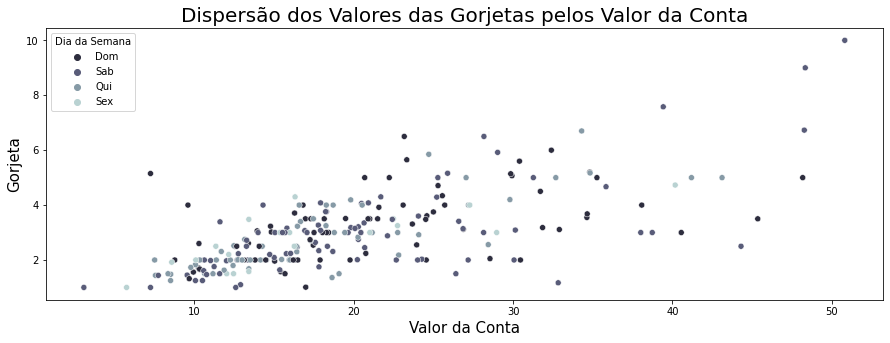

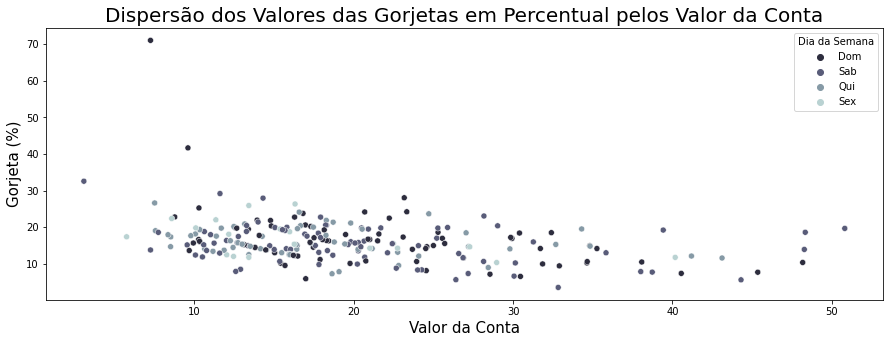

In [119]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='Valor da Conta', y='Gorjeta', hue='Dia da Semana', data=df, legend='full', palette='bone')
ax.set_title("Dispersão dos Valores das Gorjetas pelos Valor da Conta", fontsize=20)
ax.set_xlabel("Valor da Conta", fontsize=15)
ax.set_ylabel("Gorjeta", fontsize=15)

plt.figure(figsize=(15,5))
ax_1 = sns.scatterplot(x='Valor da Conta', y='Gorjeta (%)', hue='Dia da Semana', data=df, legend='full', palette='bone')
ax_1.set_title("Dispersão dos Valores das Gorjetas em Percentual pelos Valor da Conta", fontsize=20)
ax_1.set_xlabel("Valor da Conta", fontsize=15)
ax_1.set_ylabel("Gorjeta (%)", fontsize=15)

In [115]:
df.corr()

Índice,Valor da Conta,Gorjeta,Total de Pessoas,Gorjeta (%)
Índice,,,,
Valor da Conta,1.000000,0.675734,0.598315,-0.338629
Gorjeta,0.675734,1.000000,0.489299,0.342361
Total de Pessoas,0.598315,0.489299,1.000000,-0.142844
Gorjeta (%),-0.338629,0.342361,-0.142844,1.000000


Das Primeiras Análises, podes-se perceber que:

1. O Valor da gorjeta tente a aumentar de acordo com o aumento do valor da conta;
2. O total de pessoas têm alta influência no valor das gorjetas. Porém, há uma maior dispersão ao aumentar o valor da conta. Podemos perceber pelo gráfico de dispersão em conjunto com o valor da correlação linear entre as variáveis.

In [107]:
df['Gorjeta (%)'] = round(df["Gorjeta"] / df["Valor da Conta"], 4)*100
df[:5]

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
0,16.99,1.01,Não,Dom,Jantar,2,5.94
1,10.34,1.66,Não,Dom,Jantar,3,16.05
2,21.01,3.50,Não,Dom,Jantar,3,16.66
3,23.68,3.31,Não,Dom,Jantar,2,13.98
4,24.59,3.61,Não,Dom,Jantar,4,14.68


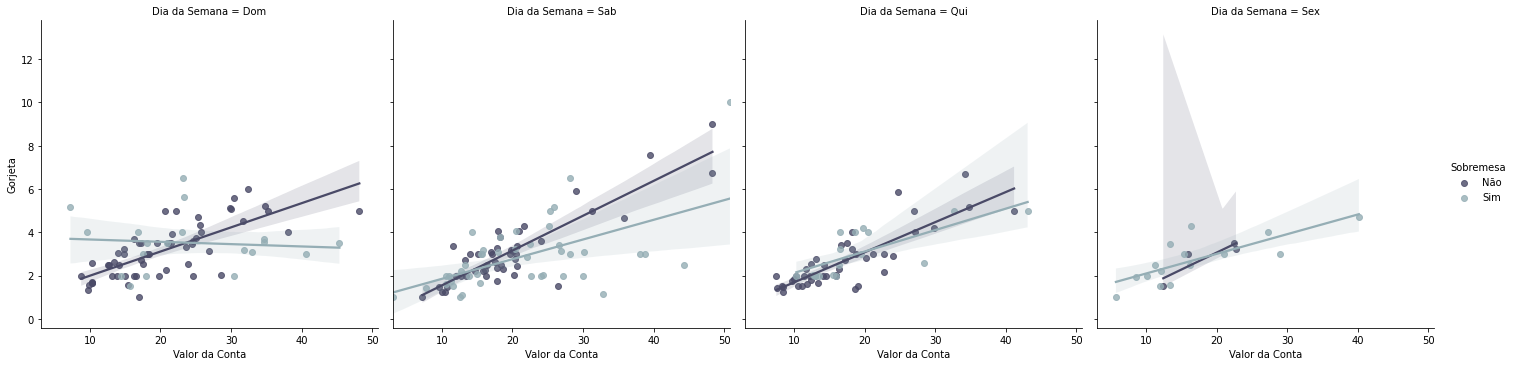

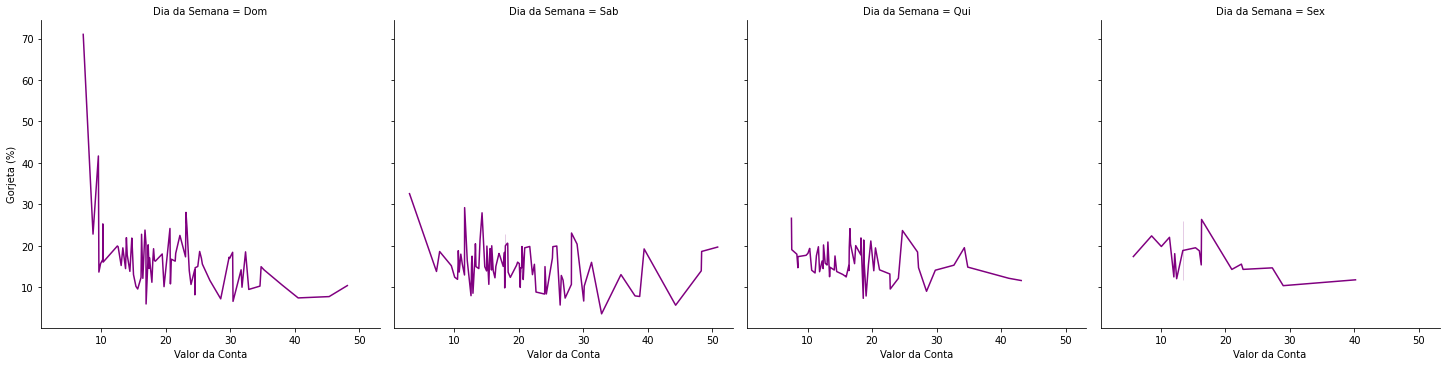

In [126]:
sns.lmplot(x='Valor da Conta', y='Gorjeta', col='Dia da Semana', hue='Sobremesa', data=df, legend='full', palette='bone');

sns.relplot(x='Valor da Conta', y='Gorjeta (%)', kind='line', data=df, color='purple', col="Dia da Semana");

Text(0, 0.5, 'Porcentagem da Gorjeta (%)')

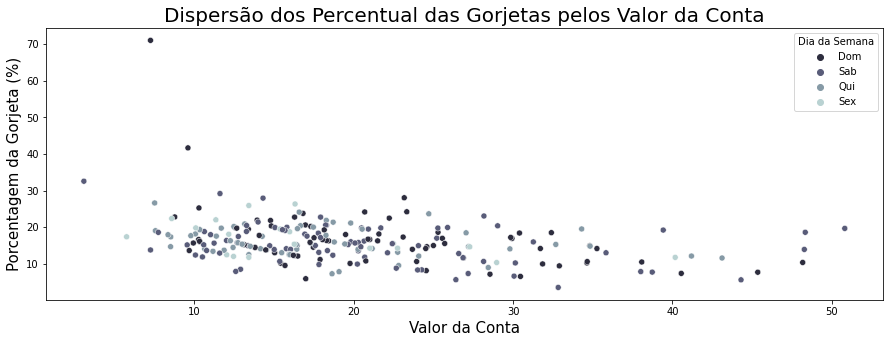

In [112]:
plt.figure(figsize=(15,5))
ax=sns.scatterplot(x='Valor da Conta', y='Gorjeta (%)', hue='Dia da Semana', data=df, palette='bone');
ax.set_title("Dispersão dos Percentual das Gorjetas pelos Valor da Conta", fontsize=20)
ax.set_xlabel("Valor da Conta", fontsize=15)
ax.set_ylabel("Porcentagem da Gorjeta (%)", fontsize=15)

Observações:

1. É importante notar que quem não come sobremesa, gealmente, dá um valor de gorjeta maior para que come sobremesa;
2. Em dias de semana (quinta e sexta), quase não há diferença nos valores das gorjetas para quem come ou não sobremesa;
3. 

## 04. Aprofundando a Análise

In [136]:
df.head(3)

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
0,16.99,1.01,Não,Dom,Jantar,2,5.94
1,10.34,1.66,Não,Dom,Jantar,3,16.05
2,21.01,3.50,Não,Dom,Jantar,3,16.66


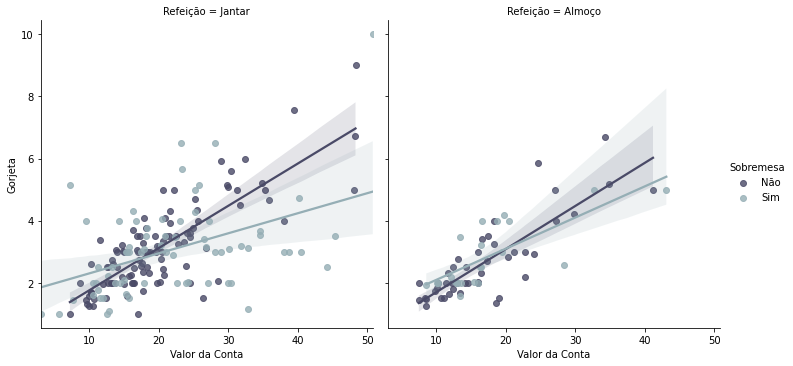

In [135]:
sns.lmplot(x='Valor da Conta', y='Gorjeta', col='Refeição', hue='Sobremesa', data=df, legend='full', palette='bone');

Observação:

- É possível notar que há uma diferença crescente na gorjeta dada com relação à refeição do dia.
- Ainda que quem não coma sobremesa dê uma gorjeta maior, no almoço essa diferença não é tão expressiva quanto no jantar.

['Dia da Semana',
 'Gorjeta',
 'Gorjeta (%)',
 'Sobremesa',
 'Total de Pessoas',
 'Valor da Conta']

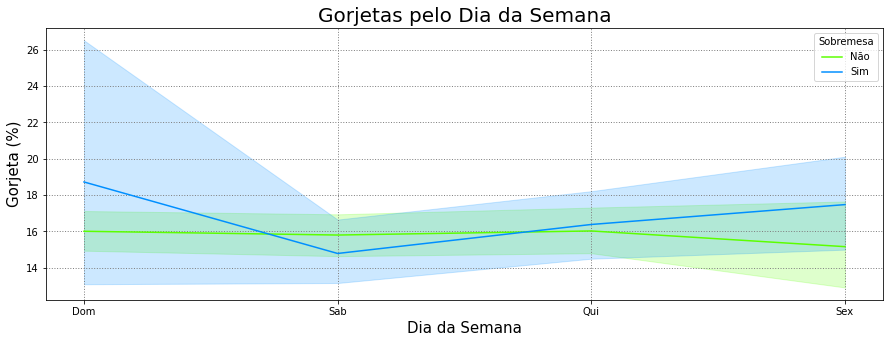

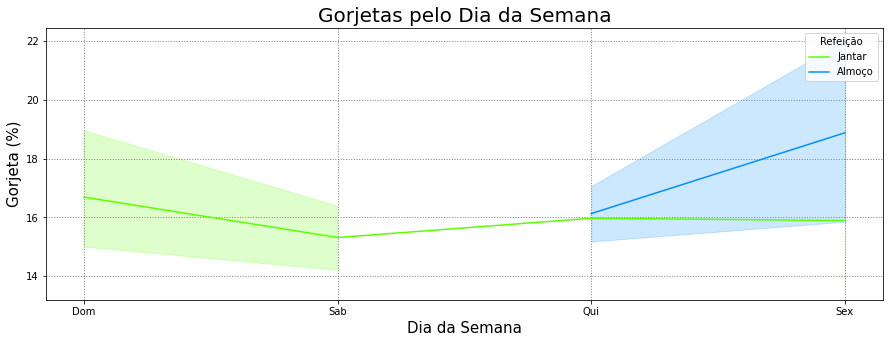

In [186]:
ax=df.copy()
plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
ax = sns.lineplot(data=ax,x="Dia da Semana",y="Gorjeta (%)", hue="Sobremesa", palette='gist_rainbow')
ax.set_title("Gorjetas pelo Dia da Semana", fontsize=20)
ax.set_ylabel("Gorjeta (%)", fontsize=15)
ax.set_xlabel("Dia da Semana", fontsize=15);

ax=df.copy()
plt.figure(figsize=(15,5))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
ax_1 = sns.lineplot(data=ax,x="Dia da Semana",y="Gorjeta (%)", hue="Refeição", palette='gist_rainbow')
ax_1.set_title("Gorjetas pelo Dia da Semana", fontsize=20)
ax_1.set_ylabel("Gorjeta (%)", fontsize=15)
ax_1.set_xlabel("Dia da Semana", fontsize=15);

Interessante notar o comportamento das gorjetas no decorrer da semana:

1. Na quinta-feira, praticamente não faz diferença quem come ou não sobremesa;
2. No domingo, há maior diferença para quem como ou não sobremesa. Ou seja, quem pede sobremesa dá mais gorjetas. Comportamento semelhante é percebido na sexta-feira;
3. No sábado, há maior gorjeta para quem não pede sobremesa.

In [129]:
print("Soma total de gorjetas por refeição:")
porct_tip=df.groupby("Refeição")[['Gorjeta']].sum()
porct_tip['Gorjeta (%)'] = round(100*porct_tip / porct_tip.sum(), 2)
porct_tip

Soma total de gorjetas por refeição:


Índice,Gorjeta,Gorjeta (%)
Refeição,,
Almoço,185.51,25.36
Jantar,546.07,74.64


In [134]:
print("Quantidade total de gorjetas por refeição:")
display(round(100*df["Refeição"].value_counts(normalize=True).to_frame(),2))

Quantidade total de gorjetas por refeição:


,Refeição
Jantar,72.13
Almoço,27.87


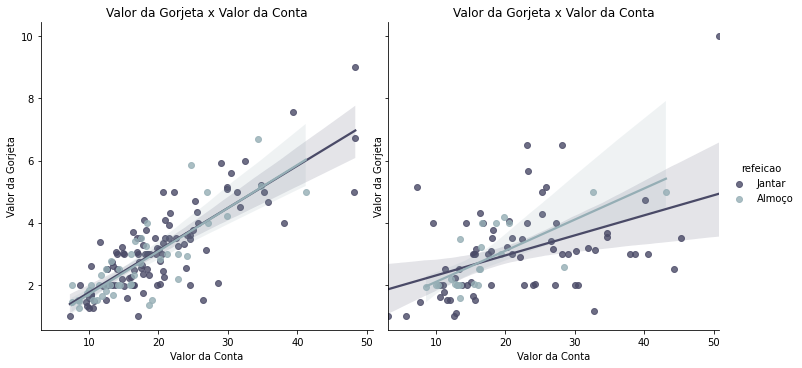

In [20]:
valor_gorjeta = sns.lmplot(x='valor_conta', y='gorjeta', col='sobremesa', hue='refeicao', data=df, palette='bone')
valor_gorjeta.set(xlabel='Valor da Conta', ylabel='Valor da Gorjeta', 
                  title='Valor da Gorjeta x Valor da Conta');

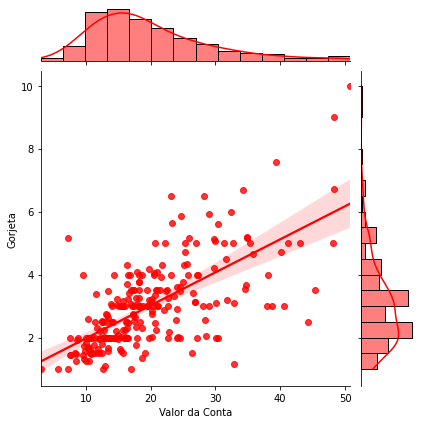

In [190]:
# "kind" must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta',  kind='reg' ,data=df, color='red')

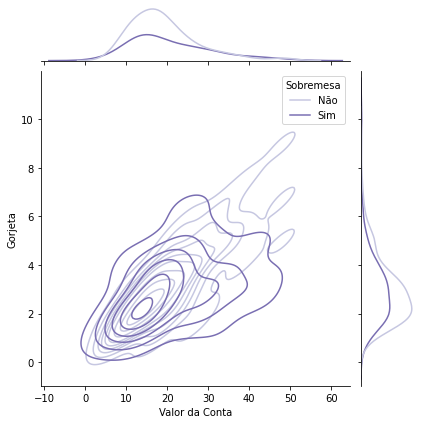

In [191]:
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta', hue='Sobremesa',  kind='kde', data=df, palette='Purples')

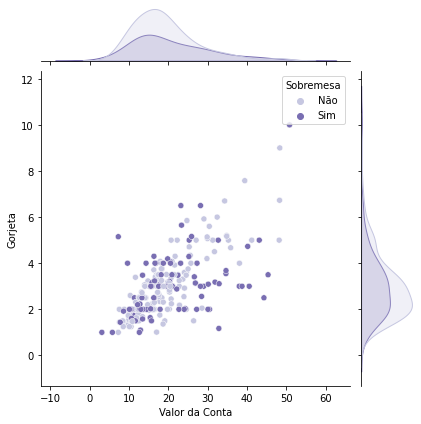

In [192]:
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta', hue='Sobremesa', 
                                kind='scatter' ,data=df, palette='Purples')

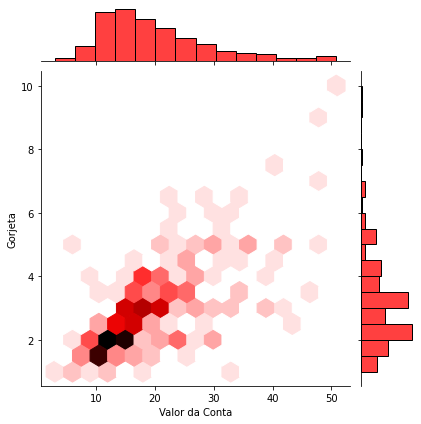

In [193]:
valor_gorjata_2 = sns.jointplot(x='Valor da Conta', y='Gorjeta', kind='hex' ,data=df, color='red')

## 05.Analisando a sobremesa

In [194]:
com_sobremesa=df.query("Sobremesa=='Sim'")
com_sobremesa[:5]

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
56,38.01,3.00,Sim,Sab,Jantar,4,7.89
58,11.24,1.76,Sim,Sab,Jantar,2,15.66
60,20.29,3.21,Sim,Sab,Jantar,2,15.82
61,13.81,2.00,Sim,Sab,Jantar,2,14.48
62,11.02,1.98,Sim,Sab,Jantar,2,17.97


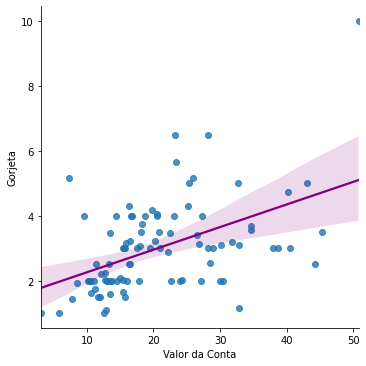

In [195]:
sns.lmplot(x='Valor da Conta',y='Gorjeta',data=com_sobremesa, 
           line_kws={'color':'purple'});

In [196]:
sem_sobremesa = df.query("Sobremesa=='Não'")
sem_sobremesa.head()

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
0,16.99,1.01,Não,Dom,Jantar,2,5.94
1,10.34,1.66,Não,Dom,Jantar,3,16.05
2,21.01,3.50,Não,Dom,Jantar,3,16.66
3,23.68,3.31,Não,Dom,Jantar,2,13.98
4,24.59,3.61,Não,Dom,Jantar,4,14.68


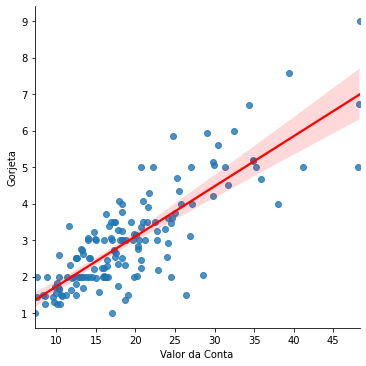

In [197]:
sns.lmplot(x='Valor da Conta',y='Gorjeta',data=sem_sobremesa, 
           line_kws={'color':'red'});

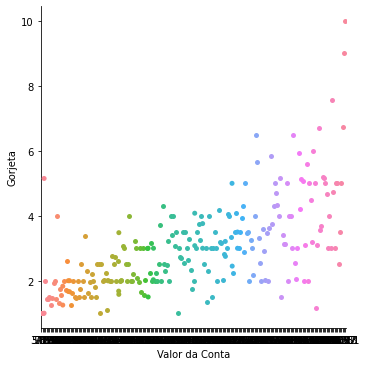

In [198]:
sns.catplot(x='Valor da Conta',y='Gorjeta',data=df)

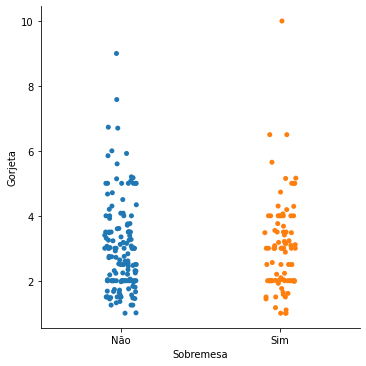

In [199]:
sns.catplot(x='Sobremesa',y='Gorjeta',data=df);

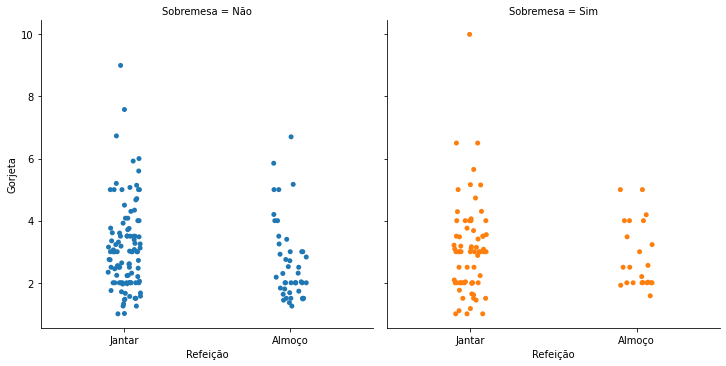

In [201]:
sns.catplot(x='Refeição',y='Gorjeta', col='Sobremesa', hue='Sobremesa',data=df);

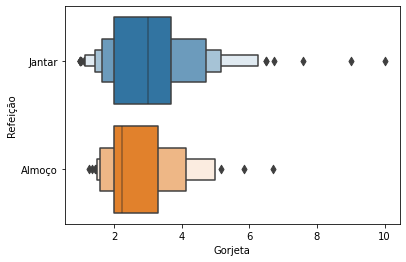

In [203]:
sns.boxenplot(df.Gorjeta, df['Refeição']);

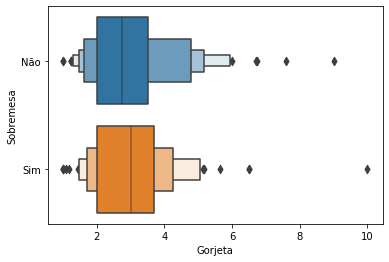

In [204]:
sns.boxenplot(df.Gorjeta, df.Sobremesa);

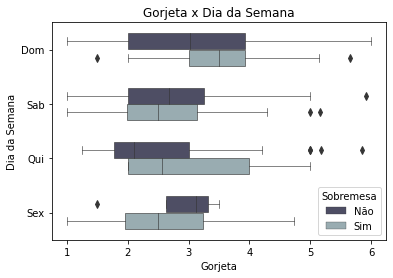

In [205]:
graph = sns.boxplot(df.query("Gorjeta<=6").Gorjeta, df["Dia da Semana"], df.Sobremesa, palette='bone', linewidth=0.6, width=0.6);
graph.set(xlabel='Gorjeta', ylabel='Dia da Semana')
graph.set_title('Gorjeta x Dia da Semana');

## 06.Testes de Hipóteses

<b>H0:</b> Distribuição de Taxa de gorjetas é a mesma nos dois grupos
    
<b>H1:</b> Distribuição de Taxa de gorjetas NÃO é a mesma nos dois grupos

In [206]:
from scipy.stats import ranksums

In [207]:
com_sobremesa[:5]

Índice,Valor da Conta,Gorjeta,Sobremesa,Dia da Semana,Refeição,Total de Pessoas,Gorjeta (%)
56,38.01,3.00,Sim,Sab,Jantar,4,7.89
58,11.24,1.76,Sim,Sab,Jantar,2,15.66
60,20.29,3.21,Sim,Sab,Jantar,2,15.82
61,13.81,2.00,Sim,Sab,Jantar,2,14.48
62,11.02,1.98,Sim,Sab,Jantar,2,17.97


In [209]:
com_sobremesa = com_sobremesa["Gorjeta (%)"]
sem_sobremesa = sem_sobremesa["Gorjeta (%)"]

In [210]:
estatistica_teste, p_valor = ranksums(com_sobremesa, sem_sobremesa)
print(f"O p-valor é: {p_valor.round(3)}")

O p-valor é: 0.559


Como o p-valor >0.05, seguimos com a hipótese nula! Utilizando o teste de Wilcoxon